In [1]:
import sys
# Edit to wherever you've installed the NS_NFMC PyMC3 fork.
sys.path.insert(1, '/home/richard/pymc3_dev/')
import arviz as az
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano.tensor as tt

print(f"Running on PyMC3 v{pm.__version__}")

az.style.use("arviz-darkgrid")

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


Running on PyMC3 v3.11.0


First example is a 4d Gaussian with 2 modes, with weights defined by w1 and w2. 

In [2]:
n = 4

mu1 = np.ones(n) * (1.0 / 2)
mu2 = -mu1

stdev = 0.1
sigma = np.power(stdev, 2) * np.eye(n)
isigma = np.linalg.inv(sigma)
dsigma = np.linalg.det(sigma)

w1 = 0.1  # one mode with 0.1 of the mass                                                                                                                                                                   
w2 = 1 - w1  # the other mode with 0.9 of the mass                                                                                                                                                          

def two_gaussians(x):
    log_like1 = (
        -0.5 * n * tt.log(2 * np.pi)
        - 0.5 * tt.log(dsigma)
        - 0.5 * (x - mu1).T.dot(isigma).dot(x - mu1)
    )
    log_like2 = (
        -0.5 * n * tt.log(2 * np.pi)
        - 0.5 * tt.log(dsigma)
        - 0.5 * (x - mu2).T.dot(isigma).dot(x - mu2)
    )
    return pm.math.logsumexp([tt.log(w1) + log_like1, tt.log(w2) + log_like2])

with pm.Model() as model:
    X = pm.Uniform(
        "X",
        shape=n,
        lower=-2.0 * np.ones_like(mu1),
        upper=2.0 * np.ones_like(mu1),
        testval=-1.0 * np.ones_like(mu1),
    )
    llk = pm.Potential("llk", two_gaussians(X))
    trace = pm.sample_ns_nfmc(50000, rho=1e-3, chains=2, frac_validate=0.3, alpha=(0,0))
    az_trace = az.from_pymc3(trace)


Initializing normalizing flow based nested sampling...
Sampling 2 chains in 0 job
/home/richard/pymc3_dev/pymc3/sampling.py:1924: UserWarning: The effect of Potentials on other parameters is ignored during prior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  warnings.warn(
Stage:   0, Evidence ratio: 0


Fit wT: Time: 0.014168262481689453 Wasserstein Distance: [0.8474825620651245, 0.8003817200660706, 0.7786293029785156, 0.6115620136260986]
Fit spline Time: 0.009385108947753906
logp: 0.690377950668335 -0.21684026718139648 time: 0.03184175491333008 iteration: 1 best: 1
Fit wT: Time: 0.00804901123046875 Wasserstein Distance: [0.25761476159095764, 0.1985470950603485, 0.17934677004814148, 0.15498077869415283]
Fit spline Time: 0.012322425842285156
logp: 1.1084461212158203 -0.3533468246459961 time: 0.02801656723022461 iteration: 2 best: 1
Fit wT: Time: 0.007997751235961914 Wasserstein Distance: [0.1977703869342804, 0.19477000832557678, 0.1721574366092682, 0.16540935635566711]
Fit spline Time: 0.008966922760009766
logp: 1.4351093769073486 -1.4507317543029785 time: 0.026996850967407227 iteration: 3 best: 1
Fit wT: Time: 0.011228084564208984 Wasserstein Distance: [0.15951767563819885, 0.15047727525234222, 0.11893308907747269, 0.09843763709068298]
Fit spline Time: 0.0066454410552978516
logp: 1.62

Stage:   1, Evidence ratio: [0.]


Fit wT: Time: 0.007962226867675781 Wasserstein Distance: [1.3254743814468384, 1.0340160131454468, 0.956369161605835, 0.9553665518760681]
Fit spline Time: 0.008472204208374023
logp: 8.35971450805664 8.03439712524414 time: 0.028404951095581055 iteration: 1 best: 1
Fit wT: Time: 0.009069204330444336 Wasserstein Distance: [0.18725724518299103, 0.17116914689540863, 0.1505936086177826, 0.13677076995372772]
Fit spline Time: 0.00855255126953125
logp: 8.515486717224121 7.987483501434326 time: 0.027385473251342773 iteration: 2 best: 1
Fit wT: Time: 0.0060579776763916016 Wasserstein Distance: [0.1956552416086197, 0.15566404163837433, 0.14948906004428864, 0.14502522349357605]
Fit spline Time: 0.0068318843841552734
logp: 8.897970199584961 7.852532386779785 time: 0.022930145263671875 iteration: 3 best: 1
Fit wT: Time: 0.004259586334228516 Wasserstein Distance: [0.1601441204547882, 0.15915681421756744, 0.1187867820262909, 0.10834762454032898]
Fit spline Time: 0.0057849884033203125
logp: 9.16910171508

Stage:   2, Evidence ratio: [0.00157217]


Fit wT: Time: 0.0006930828094482422 Wasserstein Distance: [1.232795000076294, 1.0866725444793701, 1.084507942199707, 0.9953871965408325]
Fit spline Time: 0.008207559585571289
logp: 16.535404205322266 15.52352237701416 time: 0.014474153518676758 iteration: 1 best: 1
Fit wT: Time: 0.009221792221069336 Wasserstein Distance: [0.2320111244916916, 0.19011496007442474, 0.18371985852718353, 0.14082710444927216]
Fit spline Time: 0.008350849151611328
logp: 16.911775588989258 15.20749568939209 time: 0.02533698081970215 iteration: 2 best: 1
Fit wT: Time: 0.006296873092651367 Wasserstein Distance: [0.1857759952545166, 0.16943323612213135, 0.15376411378383636, 0.12356206774711609]
Fit spline Time: 0.004925251007080078
logp: 17.233030319213867 14.298898696899414 time: 0.023456335067749023 iteration: 3 best: 1
Fit wT: Time: 0.007788181304931641 Wasserstein Distance: [0.22134263813495636, 0.20733562111854553, 0.16192315518856049, 0.09406543523073196]
Fit spline Time: 0.008832931518554688
logp: 17.57123

Stage:   3, Evidence ratio: [0.96736994]


Fit wT: Time: 0.0006971359252929688 Wasserstein Distance: [1.2581045627593994, 1.172194480895996, 0.9861292839050293, 0.9833269119262695]
Fit spline Time: 0.0048410892486572266
logp: 24.01270294189453 23.784557342529297 time: 0.009261131286621094 iteration: 1 best: 1
Fit wT: Time: 0.009932279586791992 Wasserstein Distance: [0.19464422762393951, 0.15981203317642212, 0.1321677714586258, 0.10910066962242126]
Fit spline Time: 0.008914947509765625
logp: 24.23331642150879 23.762155532836914 time: 0.028347492218017578 iteration: 2 best: 1
Fit wT: Time: 0.00754237174987793 Wasserstein Distance: [0.21977612376213074, 0.21061934530735016, 0.17048460245132446, 0.14158201217651367]
Fit spline Time: 0.008392333984375
logp: 24.586774826049805 24.077713012695312 time: 0.027124881744384766 iteration: 3 best: 3
Fit wT: Time: 0.012019634246826172 Wasserstein Distance: [0.23395037651062012, 0.16772620379924774, 0.15816344320774078, 0.13578952848911285]
Fit spline Time: 0.004521369934082031
logp: 25.00143

/home/richard/pymc3_dev/pymc3/sampling.py:1924: UserWarning: The effect of Potentials on other parameters is ignored during prior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  warnings.warn(
Stage:   0, Evidence ratio: 0


Fit wT: Time: 0.010138988494873047 Wasserstein Distance: [0.8481470942497253, 0.8324667811393738, 0.7880026698112488, 0.7621114253997803]
Fit spline Time: 0.004666805267333984
logp: 1.133952021598816 0.25612711906433105 time: 0.028116941452026367 iteration: 1 best: 1
Fit wT: Time: 0.012213468551635742 Wasserstein Distance: [0.26868578791618347, 0.19491882622241974, 0.16406840085983276, 0.14278626441955566]
Fit spline Time: 0.008285284042358398
logp: 1.5358656644821167 -0.12287068367004395 time: 0.02369213104248047 iteration: 2 best: 1
Fit wT: Time: 0.008929729461669922 Wasserstein Distance: [0.2602859437465668, 0.2293354868888855, 0.17728285491466522, 0.14335881173610687]
Fit spline Time: 0.007896661758422852
logp: 1.962255597114563 -1.198437213897705 time: 0.02621293067932129 iteration: 3 best: 1
Fit wT: Time: 0.006977558135986328 Wasserstein Distance: [0.2662304937839508, 0.1928824931383133, 0.1469251811504364, 0.11830519139766693]
Fit spline Time: 0.004152774810791016
logp: 2.415450

Stage:   1, Evidence ratio: [0.]


Fit wT: Time: 0.007192134857177734 Wasserstein Distance: [1.3496464490890503, 1.0164395570755005, 0.9614391922950745, 0.960504412651062]
Fit spline Time: 0.008636951446533203
logp: 9.240791320800781 9.097434043884277 time: 0.019774436950683594 iteration: 1 best: 1
Fit wT: Time: 0.008757591247558594 Wasserstein Distance: [0.2254181206226349, 0.2151004523038864, 0.17069599032402039, 0.13550472259521484]
Fit spline Time: 0.013383865356445312
logp: 9.554898262023926 9.015765190124512 time: 0.025548934936523438 iteration: 2 best: 1
Fit wT: Time: 0.009079933166503906 Wasserstein Distance: [0.2590203583240509, 0.1611209362745285, 0.15371207892894745, 0.12050910294055939]
Fit spline Time: 0.013740301132202148
logp: 9.803106307983398 8.582013130187988 time: 0.026214122772216797 iteration: 3 best: 1
Fit wT: Time: 0.01058053970336914 Wasserstein Distance: [0.18389403820037842, 0.17390935122966766, 0.15160498023033142, 0.11819523572921753]
Fit spline Time: 0.012990236282348633
logp: 10.18328762054

Stage:   2, Evidence ratio: [0.00330146]


Fit wT: Time: 0.0009813308715820312 Wasserstein Distance: [1.2132123708724976, 1.175370216369629, 1.0261907577514648, 0.9803093671798706]
Fit spline Time: 0.008313655853271484
logp: 16.418956756591797 15.750694274902344 time: 0.016763687133789062 iteration: 1 best: 1
Fit wT: Time: 0.006019115447998047 Wasserstein Distance: [0.23010306060314178, 0.19907750189304352, 0.17785638570785522, 0.15788699686527252]
Fit spline Time: 0.004266500473022461
logp: 16.80118179321289 15.53861141204834 time: 0.0221710205078125 iteration: 2 best: 1
Fit wT: Time: 0.006872415542602539 Wasserstein Distance: [0.1889079213142395, 0.18442142009735107, 0.181582510471344, 0.17709501087665558]
Fit spline Time: 0.008359670639038086
logp: 17.199750900268555 15.510289192199707 time: 0.02430558204650879 iteration: 3 best: 1
Fit wT: Time: 0.005892276763916016 Wasserstein Distance: [0.1939583718776703, 0.14729852974414825, 0.12227015942335129, 0.10546594113111496]
Fit spline Time: 0.004084587097167969
logp: 17.40052032

Stage:   3, Evidence ratio: [0.97673243]


Fit wT: Time: 0.0009989738464355469 Wasserstein Distance: [1.3827805519104004, 1.01545250415802, 0.994701087474823, 0.9817093014717102]
Fit spline Time: 0.012572050094604492
logp: 23.9813175201416 22.792842864990234 time: 0.024317264556884766 iteration: 1 best: 1
Fit wT: Time: 0.008033990859985352 Wasserstein Distance: [0.32371553778648376, 0.16754832863807678, 0.1644161194562912, 0.1583649218082428]
Fit spline Time: 0.010334014892578125
logp: 24.42237663269043 21.984508514404297 time: 0.03183102607727051 iteration: 2 best: 1
Fit wT: Time: 0.010536432266235352 Wasserstein Distance: [0.27275604009628296, 0.13738246262073517, 0.13630236685276031, 0.12210801243782043]
Fit spline Time: 0.00561070442199707
logp: 24.72285270690918 21.210996627807617 time: 0.01996755599975586 iteration: 3 best: 1
Fit wT: Time: 0.0048274993896484375 Wasserstein Distance: [0.20133398473262787, 0.1973753720521927, 0.19618786871433258, 0.15642833709716797]
Fit spline Time: 0.004537105560302734
logp: 25.0741844177

<Figure size 720x480 with 0 Axes>

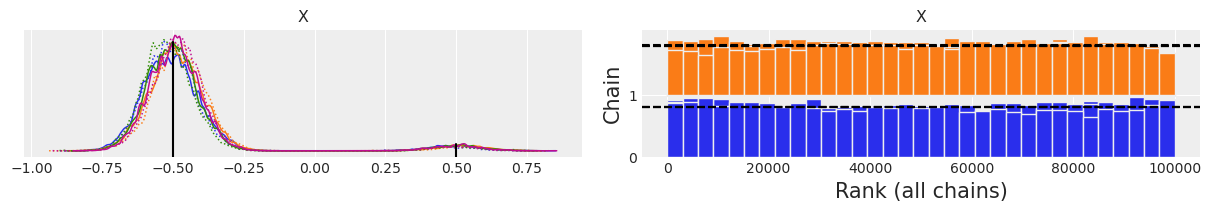

In [3]:
plt.figure()
ax = az.plot_trace(az_trace, compact=True, kind="rank_bars")
ax[0, 0].axvline(-0.5, 0, 0.9, color="k")
ax[0, 0].axvline(0.5, 0, 0.1, color="k")
plt.show()

Second example is a basic linear regression problem, simulating a y=ax+b model. Observations are distributed as d~N(ax+b,0.1).

In [4]:
x = np.arange(10)
y = 2 * x + 1 + np.random.normal(scale=0.1, size=len(x))

reg_model = pm.Model()

with reg_model:

    a = pm.Normal('a', mu=2, sigma=1.0)
    b = pm.Normal('b', mu=1, sigma=1.0)
    like = pm.Normal('like', mu=a*x+b, sigma=0.1, observed=y)
    trace = pm.sample_ns_nfmc(100000, rho=1e-3, chains=2, frac_validate=0.5, alpha=(0,0))
    az_trace = az.from_pymc3(trace)

Initializing normalizing flow based nested sampling...
Sampling 2 chains in 0 job
Stage:   0, Evidence ratio: 0


Fit wT: Time: 0.01712656021118164 Wasserstein Distance: [2.3448073863983154, 1.1384986639022827]
Fit spline Time: 0.0066149234771728516
logp: 4.935149192810059 4.92571496963501 time: 0.029764175415039062 iteration: 1 best: 1
Fit wT: Time: 0.014779090881347656 Wasserstein Distance: [0.24407488107681274, 0.13697360455989838]
Fit spline Time: 0.006750583648681641
logp: 5.1990814208984375 4.990352153778076 time: 0.024976491928100586 iteration: 2 best: 2
Fit wT: Time: 0.015143156051635742 Wasserstein Distance: [0.1500740498304367, 0.08181936293840408]
Fit spline Time: 0.0023398399353027344
logp: 5.284478187561035 4.973666191101074 time: 0.0257570743560791 iteration: 3 best: 2
Fit wT: Time: 0.0007030963897705078 Wasserstein Distance: [0.11742943525314331, 0.09680186212062836]
Fit spline Time: 0.002386808395385742
logp: 5.382384777069092 4.956123352050781 time: 0.01098179817199707 iteration: 4 best: 2
Fit wT: Time: 0.016287803649902344 Wasserstein Distance: [0.1232573390007019, 0.118285328149

Stage:   1, Evidence ratio: [0.]


Fit wT: Time: 0.025293588638305664 Wasserstein Distance: [2.351654052734375, 1.1889034509658813]
Fit spline Time: 0.00561070442199707
logp: 11.695693969726562 11.139833450317383 time: 0.03779482841491699 iteration: 1 best: 1
Fit wT: Time: 0.03105473518371582 Wasserstein Distance: [0.12321677058935165, 0.10112271457910538]
Fit spline Time: 0.006470203399658203
logp: 11.781845092773438 11.057123184204102 time: 0.045359134674072266 iteration: 2 best: 1
Fit wT: Time: 0.014642000198364258 Wasserstein Distance: [0.23599116504192352, 0.11641319841146469]
Fit spline Time: 0.0023527145385742188
logp: 12.01923656463623 11.011297225952148 time: 0.021311283111572266 iteration: 3 best: 1
Fit wT: Time: 0.007001161575317383 Wasserstein Distance: [0.1237730011343956, 0.06618451327085495]
Fit spline Time: 0.0023670196533203125
logp: 12.099847793579102 10.932319641113281 time: 0.012537240982055664 iteration: 4 best: 1
Fit wT: Time: 0.009283304214477539 Wasserstein Distance: [0.11301857978105545, 0.08140

Stage:   2, Evidence ratio: [0.07418587]


Fit wT: Time: 0.0006635189056396484 Wasserstein Distance: [2.207838296890259, 1.43980872631073]
Fit spline Time: 0.006471395492553711
logp: 16.983060836791992 16.774948120117188 time: 0.010368824005126953 iteration: 1 best: 1
Fit wT: Time: 0.0162506103515625 Wasserstein Distance: [0.8494684100151062, 0.32902762293815613]
Fit spline Time: 0.0027129650115966797
logp: 18.628889083862305 18.2143611907959 time: 0.031323909759521484 iteration: 2 best: 2
Fit wT: Time: 0.024647951126098633 Wasserstein Distance: [0.1461135298013687, 0.13615021109580994]
Fit spline Time: 0.002407073974609375
logp: 18.816158294677734 18.192996978759766 time: 0.040190696716308594 iteration: 3 best: 2
Fit wT: Time: 0.019438743591308594 Wasserstein Distance: [0.1331522911787033, 0.07768683135509491]
Fit spline Time: 0.0033767223358154297
logp: 18.911771774291992 18.20559310913086 time: 0.027182579040527344 iteration: 4 best: 2
Fit wT: Time: 0.011971235275268555 Wasserstein Distance: [0.11525342613458633, 0.078668147

Stage:   0, Evidence ratio: 0


Fit wT: Time: 0.015166282653808594 Wasserstein Distance: [2.354915142059326, 1.1260771751403809]
Fit spline Time: 0.0025794506072998047
logp: 5.013391494750977 4.649791240692139 time: 0.02649068832397461 iteration: 1 best: 1
Fit wT: Time: 0.03808331489562988 Wasserstein Distance: [0.19203560054302216, 0.1578892469406128]
Fit spline Time: 0.003134012222290039
logp: 5.237220287322998 4.663202285766602 time: 0.051937103271484375 iteration: 2 best: 2
Fit wT: Time: 0.02768111228942871 Wasserstein Distance: [0.12748876214027405, 0.11698312312364578]
Fit spline Time: 0.0025026798248291016
logp: 5.368414878845215 4.587228298187256 time: 0.043172359466552734 iteration: 3 best: 2
Fit wT: Time: 0.017069101333618164 Wasserstein Distance: [0.09097225964069366, 0.07576754689216614]
Fit spline Time: 0.0028276443481445312
logp: 5.401897430419922 4.500027179718018 time: 0.033298492431640625 iteration: 4 best: 2
Fit wT: Time: 0.020410776138305664 Wasserstein Distance: [0.09365752339363098, 0.09234029799

Stage:   1, Evidence ratio: [0.]


Fit wT: Time: 0.0011162757873535156 Wasserstein Distance: [2.1738369464874268, 1.4887369871139526]
Fit spline Time: 0.0025076866149902344
logp: 10.072951316833496 9.92642593383789 time: 0.014044761657714844 iteration: 1 best: 1
Fit wT: Time: 0.014891624450683594 Wasserstein Distance: [0.8702679872512817, 0.348445862531662]
Fit spline Time: 0.002573728561401367
logp: 11.934340476989746 11.527774810791016 time: 0.027174711227416992 iteration: 2 best: 2
Fit wT: Time: 0.030600547790527344 Wasserstein Distance: [0.1436697393655777, 0.14165396988391876]
Fit spline Time: 0.0023725032806396484
logp: 12.111989974975586 11.57105541229248 time: 0.03928542137145996 iteration: 3 best: 3
Fit wT: Time: 0.02100968360900879 Wasserstein Distance: [0.09726893156766891, 0.09059280902147293]
Fit spline Time: 0.00669550895690918
logp: 12.143404960632324 11.557835578918457 time: 0.031098127365112305 iteration: 4 best: 3
Fit wT: Time: 0.023934125900268555 Wasserstein Distance: [0.09216096997261047, 0.08351191

Stage:   2, Evidence ratio: [0.05522301]


Fit wT: Time: 0.0009415149688720703 Wasserstein Distance: [1.9719008207321167, 1.7490328550338745]
Fit spline Time: 0.0035600662231445312
logp: 16.70784568786621 16.513792037963867 time: 0.013020038604736328 iteration: 1 best: 1
Fit wT: Time: 0.02246403694152832 Wasserstein Distance: [0.8648902177810669, 0.32404056191444397]
Fit spline Time: 0.0024552345275878906
logp: 18.495935440063477 18.168363571166992 time: 0.03704690933227539 iteration: 2 best: 2
Fit wT: Time: 0.01869034767150879 Wasserstein Distance: [0.243322491645813, 0.14941662549972534]
Fit spline Time: 0.002577066421508789
logp: 18.685503005981445 18.157129287719727 time: 0.0245819091796875 iteration: 3 best: 2
Fit wT: Time: 0.01659369468688965 Wasserstein Distance: [0.12860636413097382, 0.11630566418170929]
Fit spline Time: 0.0033881664276123047
logp: 18.74955177307129 18.05756950378418 time: 0.023393869400024414 iteration: 4 best: 2
Fit wT: Time: 0.008679866790771484 Wasserstein Distance: [0.08380217105150223, 0.075370438

<Figure size 720x480 with 0 Axes>

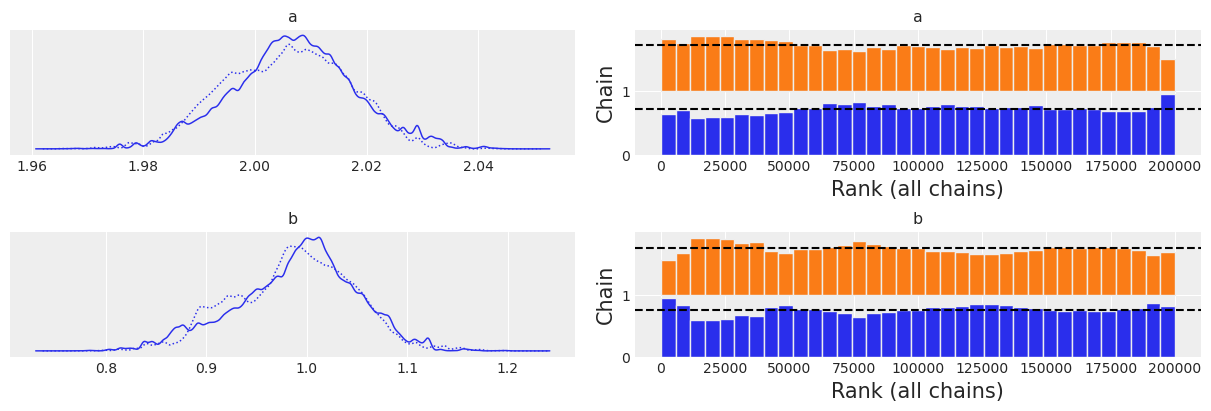

In [5]:
plt.figure()
ax = az.plot_trace(az_trace, compact=True, kind="rank_bars")
plt.show()